In [2]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/Admin/Downloads/KNN/KNNData.csv")

In [4]:
data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


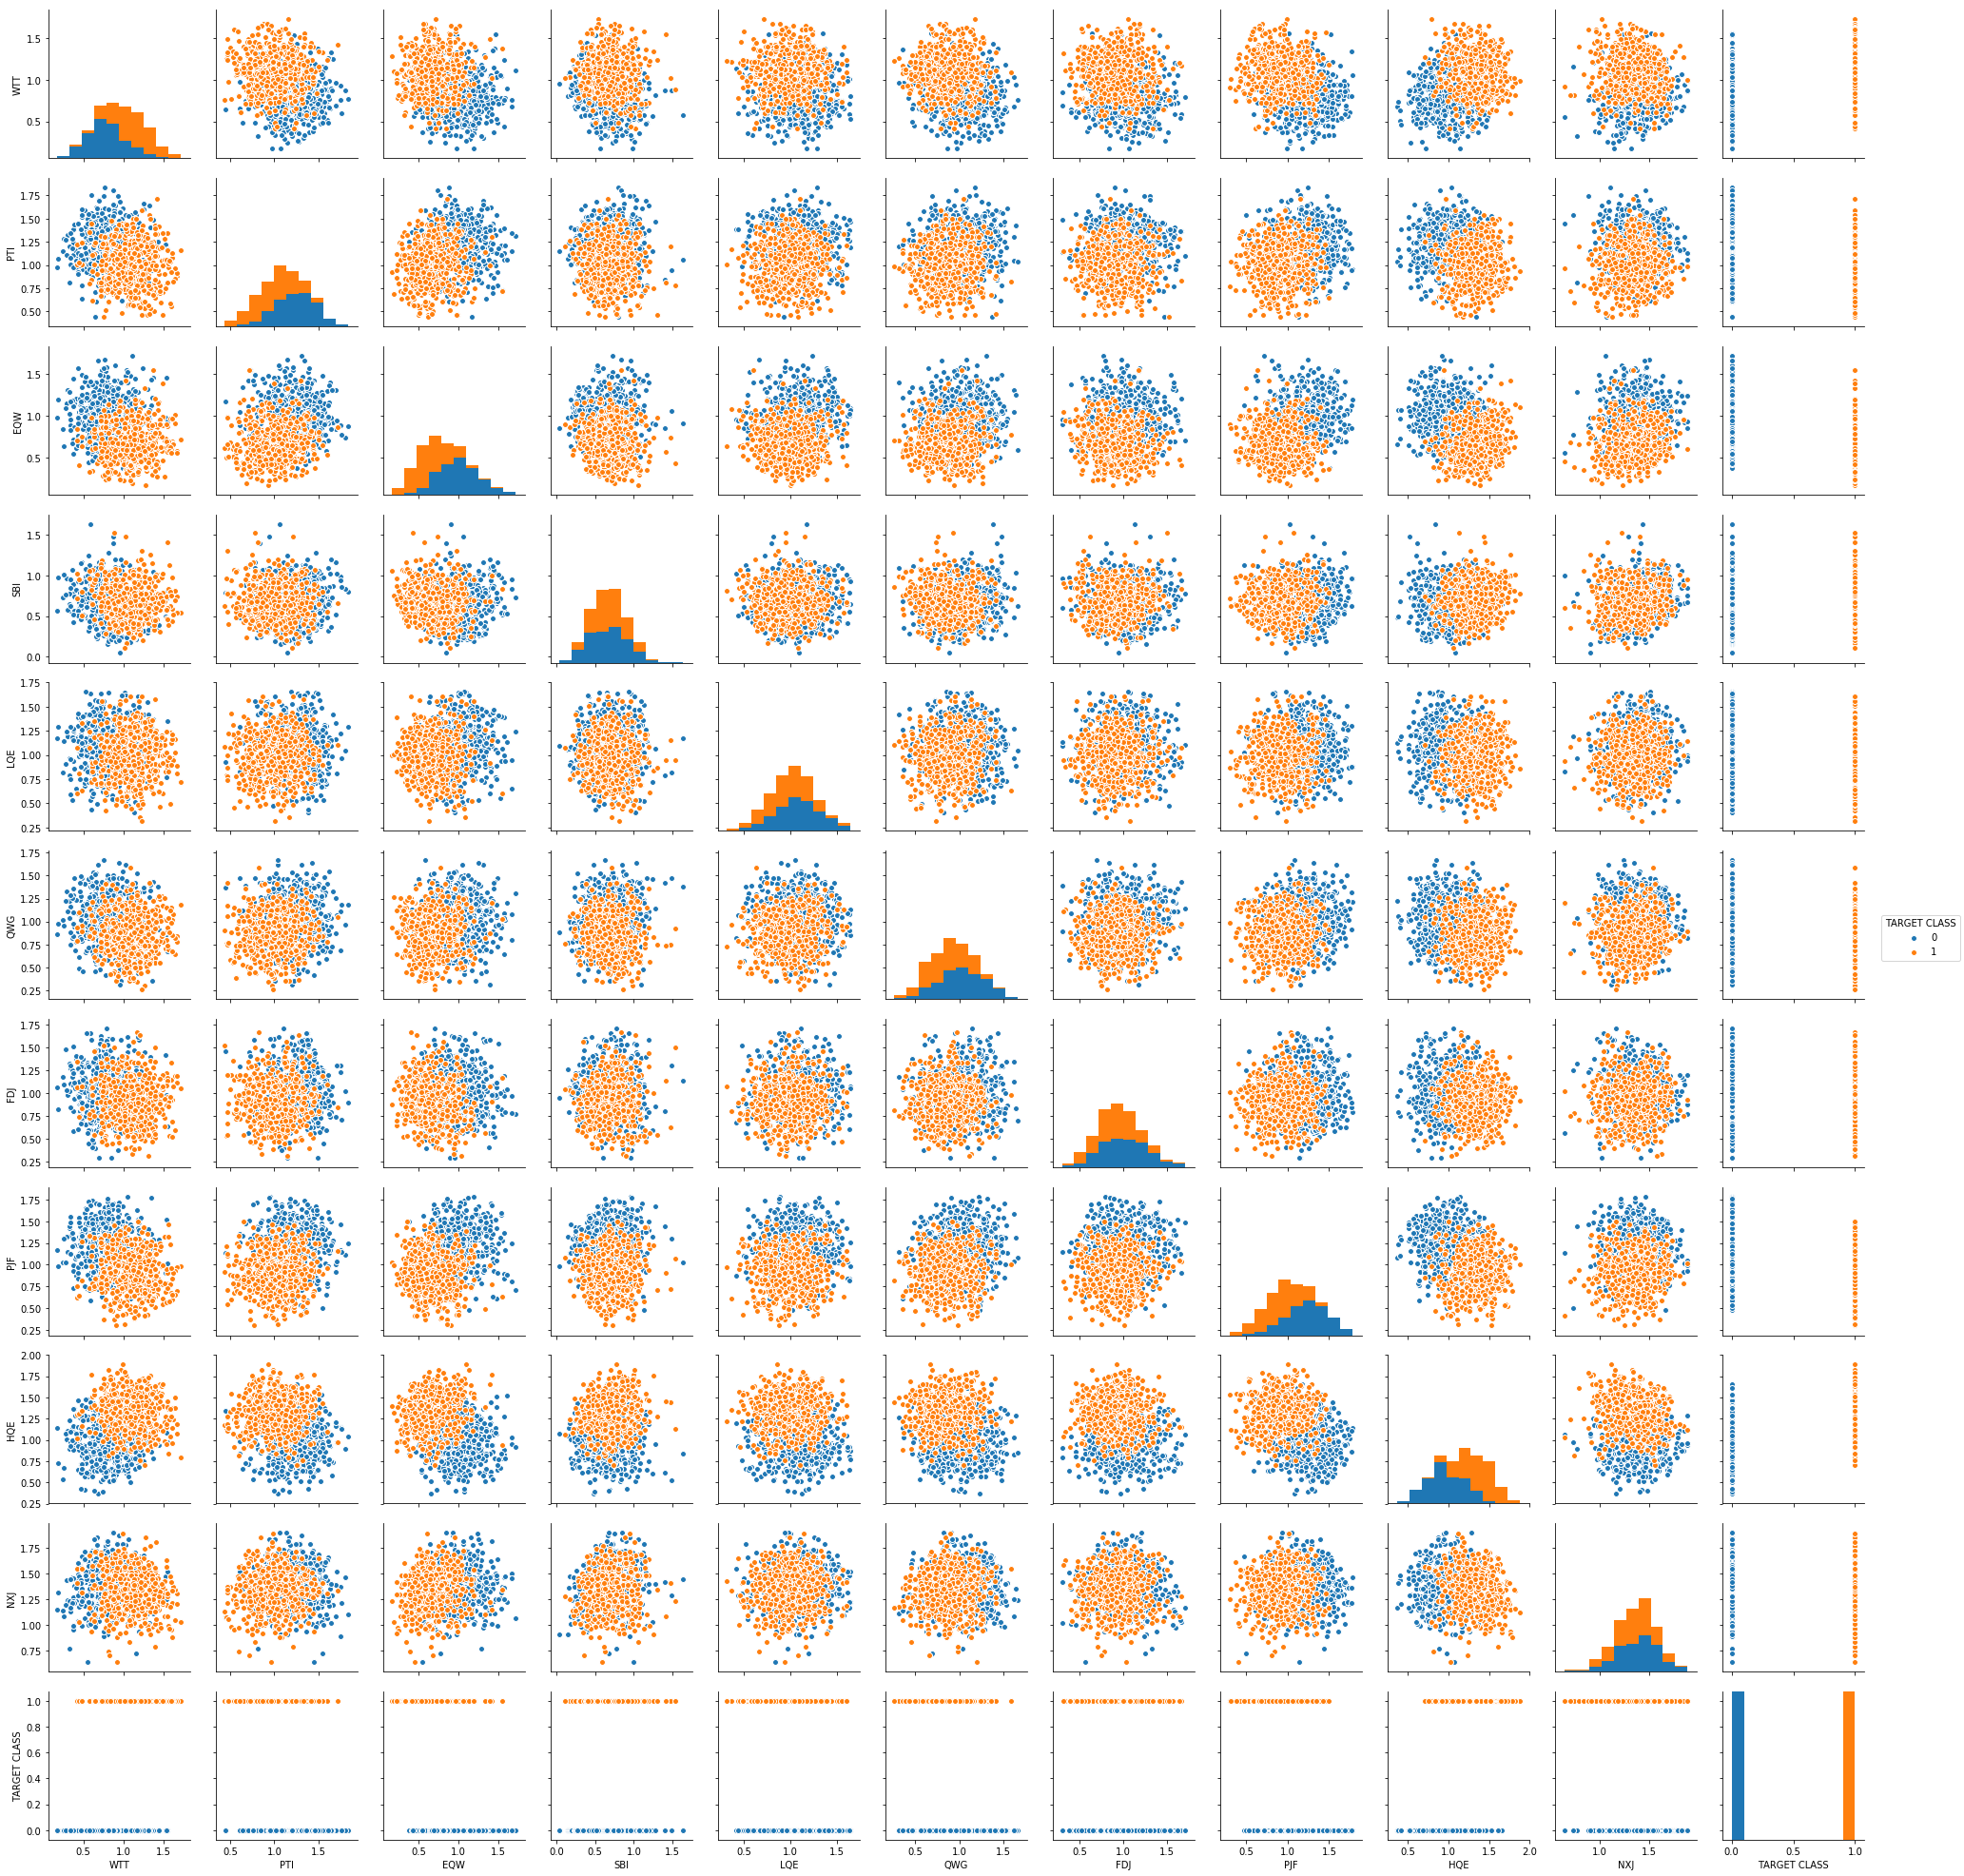

In [8]:
sns.pairplot(data,hue="TARGET CLASS")

In [10]:
from sklearn.model_selection import train_test_split
X = data.drop("TARGET CLASS",axis=1)
y = data["TARGET CLASS"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# min max normalisation

In [11]:
from sklearn.preprocessing import MinMaxScaler

min_max_sc = MinMaxScaler()
min_max_sc.fit(X_train)
X_train = min_max_sc.transform(X_train)
X_test = min_max_sc.transform(X_test)

In [12]:
X_train

array([[0.51733972, 0.12470674, 0.55957465, ..., 0.65052972, 0.40517726,
        0.69768624],
       [0.42838656, 0.69661035, 0.72444876, ..., 0.5755293 , 0.31796624,
        0.49162447],
       [0.22150106, 0.57466022, 0.45232424, ..., 0.65770925, 0.27536117,
        0.7854832 ],
       ...,
       [0.62109238, 0.39722039, 0.384425  , ..., 0.06145039, 0.36436871,
        0.59462402],
       [0.58868269, 0.53401296, 0.44602705, ..., 0.79606082, 0.09303366,
        0.42034221],
       [0.31465598, 0.86678138, 0.79054122, ..., 0.59129204, 0.37174313,
        0.56563688]])

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"misclassification error { sum((y_pred != y_test))/ X_test.shape[0]}")

Accuracy score is 0.9366666666666666
Precision score is 0.935064935064935
Recall score is 0.9411764705882353
misclassification error 0.06333333333333334


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"misclassification error { sum((y_pred != y_test))/ X_test.shape[0]}")

Accuracy score is 0.92
Precision score is 0.9271523178807947
Recall score is 0.9150326797385621
misclassification error 0.08


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

knn = KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(X_train,y_train)
y_pred  = knn.predict(X_test)
print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
print(f"Precision score is {precision_score(y_test,y_pred)}")
print(f"Recall score is {recall_score(y_test,y_pred)}")
print(f"misclassification error { sum((y_pred != y_test))/ X_test.shape[0]}")

Accuracy score is 0.93
Precision score is 0.9342105263157895
Recall score is 0.9281045751633987
misclassification error 0.07


In [42]:

misclassification_error = []
for i in range(3,15,2):
    print(f"Fitting KNN with k == {i}\n~~~~~~~~~~~~~~~~~~~")
    knn = KNeighborsClassifier(n_neighbors=i,p=2)
    knn.fit(X_train,y_train)
    y_pred  = knn.predict(X_test)
    print(f"Accuracy score is {accuracy_score(y_test,y_pred)}")
    print(f"Precision score is {precision_score(y_test,y_pred)}")
    print(f"Recall score is {recall_score(y_test,y_pred)}")
    miss_error = sum((y_pred != y_test))/ X_test.shape[0]
    print(f"misclassification error { miss_error}")
    print("",end="\n\n\n")
    misclassification_error.append(miss_error)

Fitting KNN with k == 3
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.9366666666666666
Precision score is 0.935064935064935
Recall score is 0.9411764705882353
misclassification error 0.06333333333333334



Fitting KNN with k == 5
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.92
Precision score is 0.9271523178807947
Recall score is 0.9150326797385621
misclassification error 0.08



Fitting KNN with k == 7
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.93
Precision score is 0.9342105263157895
Recall score is 0.9281045751633987
misclassification error 0.07



Fitting KNN with k == 9
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.92
Precision score is 0.9161290322580645
Recall score is 0.9281045751633987
misclassification error 0.08



Fitting KNN with k == 11
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.93
Precision score is 0.9230769230769231
Recall score is 0.9411764705882353
misclassification error 0.07



Fitting KNN with k == 13
~~~~~~~~~~~~~~~~~~~
Accuracy score is 0.9333333333333333
Precision score is 0.92903225

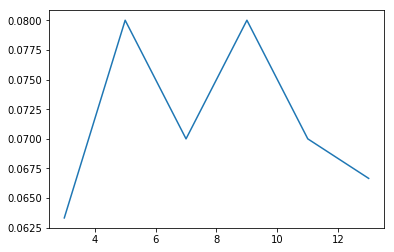

In [45]:
import matplotlib.pyplot as plt

plt.plot(list(range(3,15,2)),misclassification_error)

# grid search for KNN

In [46]:
parameters = {
    "n_neighbors": list(range(3,17,2)),
    "p":[1,2]
}

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
grid = GridSearchCV(knn,parameters,n_jobs=-1,scoring="precision")
grid.fit(X_train,y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [54]:
grid.best_params_

{'n_neighbors': 11, 'p': 2}